In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DEFINE PROBLEMS :
- Meningkatkan Penjualan SEPHORA E-Commerce melalui Brand SEPHORA COLLECTION yang berfokus pada Online Store.

### EDA GOALS :
- Mencari tahu category apa saja yang paling diminati namun memiliki rating yang dibawah rata-rata pada Brand SEPHORA COLLECTION.
- Mencari tahu cara mempertahankan dan meningkatkan penjualan Brand SEPHORA COLLECTION berdasarkan category yang paling diminati namun memiliki rating yang dibawah rata-rata melalui startegi pada Online Store.

In [15]:
df = pd.read_csv('sephora.csv')
df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


In [16]:
print(df.shape)

(9168, 21)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

## DESCRIPTIVE ANALYSIS, HANDLING OUTLIERS, AND MISSING VALUES

### Descriptive Analyis

In [19]:
df.describe().T

# Memperlihatkan perhitungan statistik dari data yang kolomnya bertipe numerikal

,count,mean,std,min,25%,50%,75%,max
id,9168.0,1.962952e+06,385971.360901,50.0,1819453.0,2072353.5,2230591.0,2359685.0
rating,9168.0,3.990020e+00,1.007707,0.0,4.0,4.0,4.5,5.0
number_of_reviews,9168.0,2.821392e+02,890.642028,0.0,10.0,46.0,210.0,19000.0
love,9168.0,1.627859e+04,42606.514471,0.0,1600.0,4800.0,13800.0,1300000.0
price,9168.0,5.006324e+01,47.164989,2.0,24.0,35.0,59.0,549.0
value_price,9168.0,5.182359e+01,49.459020,2.0,25.0,35.0,60.0,549.0
online_only,9168.0,2.348386e-01,0.423921,0.0,0.0,0.0,0.0,1.0
exclusive,9168.0,2.647251e-01,0.441211,0.0,0.0,0.0,1.0,1.0
limited_edition,9168.0,9.184119e-02,0.288817,0.0,0.0,0.0,0.0,1.0
limited_time_offer,9168.0,3.272251e-04,0.018087,0.0,0.0,0.0,0.0,1.0


In [30]:
df.describe(include = "O")

# Memperlihatkan perhitungan statistik dari data yang kolomnya bertipe object
# Dapat dilihat bahwa top brand dari Sephora E-Commerce adalah SEPHORA COLLECTION dengan catergory Perfume

,brand,category,name,size,URL,MarketingFlags_content,options,details,how_to_use,ingredients
count,9168,9168,9168,9168,9168,9168,9168,9168,9168,9168
unique,324,143,9106,1623,9168,10,564,8839,6497,6962
top,SEPHORA COLLECTION,Perfume,Blush,no size,https://www.sephora.com/product/after-shave-ba...,0,no options,no details,no instructions,unknown
freq,496,665,4,3161,1,4786,8377,14,1573,1630


In [32]:
dfsephora = df[df['brand'] == "SEPHORA COLLECTION"]
dfsephora

# Mengelompokkan menjadi DataFrame dengan Brand "SEPHORA COLLECTION" saja

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
7030,1802677,SEPHORA COLLECTION,Face Wipes,Cleansing & Exfoliating Wipes,25 Wipes,4.5,3000,224700,8.0,8.0,...,True,exclusive,no options,What it is: A collection of cleansing and exf...,Suggested Usage:Cleansing Wipes: -Gently wipe ...,-Coconut Water Extract.\n\n Water- Caprylic/C...,0,1,0,0
7031,1973700,SEPHORA COLLECTION,Face Masks,Face Mask,1 Mask,4.5,1000,117100,6.0,6.0,...,True,exclusive,no options,To redeem your offer: \n1. SELECT FOUR MASKS: ...,Suggested Usage:-Unfold the mask and peel off ...,-Aloe Vera Extract of natural origin: Helps s...,0,1,0,0
7032,1118033,SEPHORA COLLECTION,Eyeliner,Retractable Waterproof Eyeliner,no size,4.5,6000,153900,13.0,13.0,...,True,exclusive,no options,What it is:A long-lasting- waterproof eyeliner...,Suggested Usage:-Apply to the lash line of the...,Cyclopentasiloxane- Iron Oxides (CI 77499)- Sy...,0,1,0,0
7033,1931005,SEPHORA COLLECTION,Brush Sets,Ready To Roll Brush Set,no size,4.5,356,123400,70.0,195.0,...,True,exclusive,no options,What it is: A set of 10 brushes curated to inc...,no instructions,unknown,0,1,0,0
7034,2222099,SEPHORA COLLECTION,Foundation,10 HR Wear Perfection Foundation,0.84 oz/ 25 mL,4.0,3000,128400,20.0,20.0,...,True,exclusive,no options,What it is: A weightless foundation with build...,Suggested Usage:\nHow to choose the right foun...,Water- Dimethicone- Isohexadecane- Dimethicone...,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


In [39]:
dfsephora.corr().T

# Berdasarkan korelasi yang dilakukan, ada beberapa keterkaitan antara kolom yang mendekati nilai 1
# yaitu antara kolom number_of_reviews dan love, kemudian kolom MarketingFlags dengan exclusive
# hal ini akan dianalisa lebih lanjut apakah ada keterkaitan antara kolom-kolom tersebut

,id,rating,number_of_reviews,love,price,value_price,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer
id,1.000000,-0.013982,-0.266032,-0.172881,-0.123911,-0.109649,0.309930,0.039538,0.222330,0.096287,NaN
rating,-0.013982,1.000000,0.125883,0.147082,0.023946,0.033810,0.159534,-0.004441,0.128033,0.019885,NaN
number_of_reviews,-0.266032,0.125883,1.000000,0.872225,-0.081473,-0.073178,0.036920,-0.057968,0.052405,-0.112549,NaN
love,-0.172881,0.147082,0.872225,1.000000,-0.011374,0.037814,0.060755,-0.058944,0.072955,-0.051015,NaN
price,-0.123911,0.023946,-0.081473,-0.011374,1.000000,0.890645,-0.088015,-0.035750,-0.105599,0.085117,NaN
value_price,-0.109649,0.033810,-0.073178,0.037814,0.890645,1.000000,-0.054186,-0.021764,-0.071190,0.056499,NaN
MarketingFlags,0.309930,0.159534,0.036920,0.060755,-0.088015,-0.054186,1.000000,0.049402,0.839866,0.074535,NaN
online_only,0.039538,-0.004441,-0.057968,-0.058944,-0.035750,-0.021764,0.049402,1.000000,-0.095546,0.055452,NaN
exclusive,0.222330,0.128033,0.052405,0.072955,-0.105599,-0.071190,0.839866,-0.095546,1.000000,0.032850,NaN
limited_edition,0.096287,0.019885,-0.112549,-0.051015,0.085117,0.056499,0.074535,0.055452,0.032850,1.000000,NaN


### Handling Outliers

In [43]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

# Rumus untuk menghitung Outliers (Include Q1, Q3, IQR, Lower Fence, Upper Fence)

In [56]:
# Pengecekan Outliers Rating
outliers = []
cek_outlier(dfsephora['rating'])
outliersrating = pd.DataFrame(outliers, columns = ["Outliers Rating"])
outliersrating

# Berdasarkan pengecekan Outliers Rating, dapat dilihat bahwa ada 2 nilai outliers yaitu nilai 0 dan 1.5
# saya memilih untuk mengabaikan dari hasil ini dikarenakan kolom ini adalah rating yang diberikan oleh customers
# Tidak dilakukan pengubahan data terhadap Outliers Rating

,Outliers Rating
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [59]:
# Pengecekan Outliers love
outliers = []
cek_outlier(dfsephora['love'])
outlierslove = pd.DataFrame(outliers, columns = ["Outliers Love"])
outlierslove
# Berdasarkan pengecekan Outliers love, saya juga memilih untuk mengabaikan hasil dari outliers ini dikarenakan
# kolom love ini adalah jumlah dari orang yang suka terhadap produk tersebut.
# Tidak dilakukan pengubahan data terhadap Outliers Love

,Outliers Love
0,224700
1,117100
2,153900
3,123400
4,128400
5,55700
6,628100
7,100200
8,40400
9,168600


In [60]:
# Pengecekan Outliers Price
outliers = []
cek_outlier(dfsephora['price'])
outliersprice = pd.DataFrame(outliers, columns = ["Outliers Price"])
outliersprice
# Berdasarkan pengecekan Outliers Price, saya memilih untuk mengabaikan dari hasil ini dikarenakan 
# kolom ini adalah harga barang yang dijual
# Tidak dilakukan pengubahan data terhadap Outliers Price

,Outliers Price
0,70.0
1,58.0
2,45.0
3,68.0
4,69.0
5,40.0
6,42.0
7,60.0
8,68.0
9,50.0


In [61]:
# Pengecekan Outliers Value_Price
outliers = []
cek_outlier(dfsephora['value_price'])
outliersvalueprice = pd.DataFrame(outliers, columns = ["Outliers Value_Price"])
outliersvalueprice
# Berdasarkan pengecekan Outliers Price, saya memilih untuk mengabaikan dari hasil ini dikarenakan 
# kolom ini adalah harga barang sebelum didiskon
# Tidak dilakukan pengubahan data terhadap Outliers Value_Price

,Outliers Value_Price
0,195.0
1,58.0
2,117.0
3,68.0
4,69.0
5,79.0
6,42.0
7,60.0
8,68.0
9,50.0


### Pengecekan Missing Values

In [65]:
dfsephora.isna().sum()
# Tidak ada data missing values pada DataFrame Sephora, 
# sehingga tidak ada yang perlu di drop/di handling terhadap missing values

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

## EXPLORATORY DATA ANALYSIS

### Analisis Data

In [33]:
kotak = []
for i in dfsephora['category'].unique():
    kotak.append(i)
    
totalkotak = dfsephora['category'].nunique()

print(totalkotak)
print(kotak,end="")

# Untuk mengecek ada berapa total category yang dimiliki oleh SEPHORA COLLECTION. Total ada 92 kategori.

92
['Face Wipes', 'Face Masks', 'Eyeliner', 'Brush Sets', 'Foundation', 'Lipstick', 'Eyebrow', 'Face Oils', 'Face Serums', 'False Eyelashes', 'Eye Masks', 'Face Sets', 'Eyeshadow', 'Concealer', 'Eye Palettes', 'Eye Creams & Treatments', 'Face Brushes', 'Sheet Masks', 'Makeup Palettes', 'Hand Cream & Foot Cream', 'Lip Gloss', 'Lip Balm & Treatment', 'Hair Removal', 'Eye Brushes', 'Facial Rollers', 'Lip Sets', 'Value & Gift Sets', 'Moisturizers', 'Lip Liner', 'Makeup Removers', 'Beauty Supplements', 'Self Tanners', 'Face Primer', 'Lip Stain', 'Face Wash & Cleansers', 'Hair Masks', 'Nail', 'Hair Styling Products', 'Mascara', 'Brush Cleaners', 'Facial Peels', 'no category', 'Blush', 'Night Creams', 'Eye Primer', 'Bronzer', 'Facial Cleansing Brushes', 'Eye Sets', 'Tinted Moisturizer', 'Highlighter', 'Color Correct', 'Sponges & Applicators', 'Spa Tools', 'Eyelash Curlers', 'Hair Brushes & Combs', 'Makeup Bags & Travel Cases', 'Lip Balms & Treatments', 'Hair Accessories', 'Blemish & Acne Trea

In [76]:
mean1 = dfsephora.groupby(dfsephora['category']).mean()
mean1["rating"]
rating = mean1["rating"].to_frame()
rating

# Untuk mengekstrak nilai rating tiap-tiap category berdasarkan rata-rata

,rating
category,
Accessories,3.000000
Anti-Aging,4.000000
Bath Soaks & Bubble Bath,3.500000
Beauty Supplements,3.307692
Blemish & Acne Treatments,3.100000
...,...
Tinted Moisturizer,2.000000
Toners,4.500000
Tweezers & Eyebrow Tools,4.666667


In [77]:
sum1 = dfsephora.groupby(dfsephora['category']).sum()
sum1["number_of_reviews"]
review = sum1["number_of_reviews"].to_frame()
review

# Untuk mengekstrak nilai number_of_reviews tiap-tiap category berdasarkan total review

,number_of_reviews
category,
Accessories,16
Anti-Aging,91
Bath Soaks & Bubble Bath,11
Beauty Supplements,281
Blemish & Acne Treatments,1089
...,...
Tinted Moisturizer,239
Toners,40
Tweezers & Eyebrow Tools,516


In [96]:
ratereview = pd.concat([rating,review], axis=1)
ambil = ratereview.sort_values("number_of_reviews",ascending=False)
ambil
# Untuk menggabungkan menjadi dataframe nilai rating dan number_of_reviews pada category dan kemudian di urutkan berdasarkan
# number_of_reviews

,rating,number_of_reviews
category,,
Eyeliner,4.000000,16687
Lipstick,3.750000,13628
Foundation,4.083333,7830
Face Brushes,3.988889,6122
Face Masks,3.926471,5591
...,...,...
Hair Products,4.500000,11
Bath Soaks & Bubble Bath,3.500000,11
Conditioner,2.000000,9


In [100]:
ambil.describe().T
# dapat dilihat rata-rata rating berdasarkan tiap category adalah 3.820865 dan rata-rata number_of_reviews berdasarkan
# tiap category adalah 1316.25

,count,mean,std,min,25%,50%,75%,max
rating,92.0,3.820865,0.734956,0.0,3.50,4.0,4.257812,5.0
number_of_reviews,92.0,1316.250000,2550.083638,0.0,111.25,477.5,1133.000000,16687.0


In [126]:
# Maka diambil number_of_reviews yang dibawah rata-rata adalah category yang kurang diminati oleh Customers
ambil[ambil["number_of_reviews"] < 1316.250000]
# Ada 71 category yang kurang diminati oleh Customers dari 92 total category

,rating,number_of_reviews
category,,
Eye Brushes,3.518519,1293
Hair Accessories,3.416667,1196
Eyeshadow,3.750000,1112
Highlighter,4.071429,1098
Blemish & Acne Treatments,3.100000,1089
...,...,...
Hair Products,4.500000,11
Bath Soaks & Bubble Bath,3.500000,11
Conditioner,2.000000,9


In [129]:
ambil[ambil["number_of_reviews"] > 1316.250000]
# Berikut adalah 21 category yang paling diminati oleh para Customers

,rating,number_of_reviews
category,,
Eyeliner,4.000000,16687
Lipstick,3.750000,13628
Foundation,4.083333,7830
Face Brushes,3.988889,6122
Face Masks,3.926471,5591
Brush Cleaners,4.300000,4773
False Eyelashes,3.906250,4090
Lip Gloss,4.500000,4088
Makeup Removers,4.062500,3576


In [225]:
top = ambil.loc[(ambil['rating'] >= 3.820865) & (ambil['number_of_reviews'] > 1316.250000)]
top.head()
# berikut adalah top 5 category dari SEPHORA COLLECTION

,rating,number_of_reviews
category,,
Eyeliner,4.000000,16687
Foundation,4.083333,7830
Face Brushes,3.988889,6122
Face Masks,3.926471,5591
Brush Cleaners,4.300000,4773


In [130]:
ambil.loc[(ambil['rating'] <= 3.820865) & (ambil['number_of_reviews'] > 1316.250000)]
# berikut adalah category yang nilai ratingnya dibawah rata-rata dan nilai number_of_reviews datas rata-rata
# Keempat category ini dapat diimprove sehingga dapat meningkatkan penjualan di SEPHORA karena category ini cukup diminati
# oleh para Customers.

,rating,number_of_reviews
category,,
Lipstick,3.750000,13628
Facial Cleansing Brushes,2.833333,2339
Mascara,3.583333,2119
Face Primer,3.583333,2106


In [221]:
rendah = ambil.loc[(ambil['rating'] <= 3.820865) & (ambil['number_of_reviews'] < 1316.250000)]
rendah
# berikut adalah category yang nilai ratingnya dibawah rata-rata dan nilai number_of_reviews dibawah rata-rata

,rating,number_of_reviews
category,,
Eye Brushes,3.518519,1293
Hair Accessories,3.416667,1196
Eyeshadow,3.750000,1112
Blemish & Acne Treatments,3.100000,1089
Sponges & Applicators,3.611111,1077
Lip Balms & Treatments,3.000000,929
Setting Spray & Powder,3.666667,819
Hair Removal,3.000000,551
Hair Masks,3.500000,529


In [223]:
rendah.shape
# 29 category yang dibawah rata-rata review dan ratingnya

(29, 2)

### Visualizing Data

In [202]:
online = pd.crosstab(index = dfsephora["category"], columns = dfsephora['online_only'], normalize = "index")
online.loc["Lipstick"] # Online Only 0 -> berarti cuma ada store offline
online.loc["Facial Cleansing Brushes"] # Online Only 0 (0.667), 1 (0.333) -> berarti 33% ada di store online dan 66% online store
online.loc["Mascara"] # Online Only 0 -> berarti cuma ada store offline
online.loc["Face Primer"] # Online Only 0 -> berarti cuma ada store offline

online_only
0    1.0
1    0.0
Name: Lipstick, dtype: float64

In [151]:
limited = pd.crosstab(index = dfsephora["category"], columns = dfsephora['limited_edition'], normalize = "index")
limited.loc["Lipstick"] # Limited Edition 0 (0.625),  1(0.375) -> berarti 37.5% limited edition, dan 62.5% tidak limited edition
limited.loc["Facial Cleansing Brushes"] # Limited Edition 0 -> tidak ada limited edition
limited.loc["Mascara"] # Limited Edition 0 (0.833),  1(0.167) -> berarti 16.7% limited edition, dan 83.3% tidak limited edition
limited.loc["Face Primer"] # Limited Edition 0 (0.833),  1(0.167) -> berarti 16.7% limited edition, dan 83.3% tidak limited edition

limited_edition
0    0.833333
1    0.166667
Name: Face Primer, dtype: float64

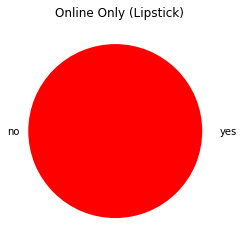

In [209]:
nama = ["no", "yes"]
plt.pie(online.loc["Lipstick"], labels=nama, colors =["r","b"], explode = (0.05, 0.05))
plt.title("Online Only (Lipstick)")
plt.show()
# untuk yang lipstick berarti cuma ada store offline

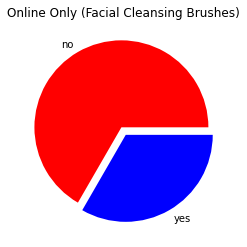

In [213]:
nama = ["no", "yes"]
plt.pie(online.loc["Facial Cleansing Brushes"], labels=nama, colors =["r","b"], explode = (0.05, 0.05))
plt.title("Online Only (Facial Cleansing Brushes)")
plt.show()
# untuk yang facial cleaning brushes berarti 33% ada di store online dan 66% online store

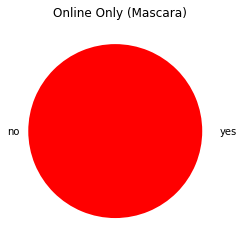

In [212]:
nama = ["no", "yes"]
plt.pie(online.loc["Mascara"], labels=nama, colors =["r","b"], explode = (0.05, 0.05))
plt.title("Online Only (Mascara)")
plt.show()
# untuk yang Mascara berarti cuma ada store offline

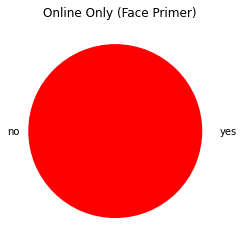

In [214]:
nama = ["no", "yes"]
plt.pie(online.loc["Face Primer"], labels=nama, colors =["r","b"], explode = (0.05, 0.05))
plt.title("Online Only (Face Primer)")
plt.show()
# untuk yang Face Primer berarti cuma ada store offline

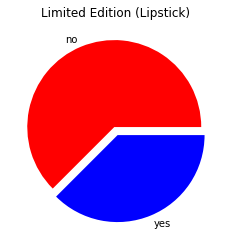

In [215]:
nama = ["no", "yes"]
plt.pie(limited.loc["Lipstick"], labels=nama, colors =["r","b"], explode = (0.05, 0.05))
plt.title("Limited Edition (Lipstick)")
plt.show()
# untuk yang lipstick berarti 37.5% limited edition, dan 62.5% tidak limited edition

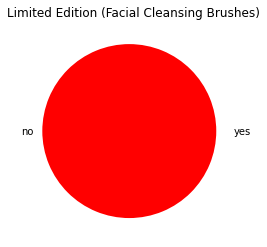

In [216]:
nama = ["no", "yes"]
plt.pie(limited.loc["Facial Cleansing Brushes"], labels=nama, colors =["r","b"], explode = (0.05, 0.05))
plt.title("Limited Edition (Facial Cleansing Brushes)")
plt.show()
# untuk yang Facial Cleansing Brushes berarti tidak ada limited edition

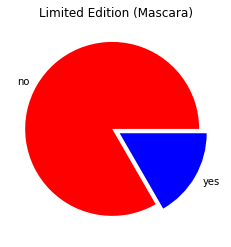

In [217]:
nama = ["no", "yes"]
plt.pie(limited.loc["Mascara"], labels=nama, colors =["r","b"], explode = (0.05, 0.05))
plt.title("Limited Edition (Mascara)")
plt.show()
# untuk yang Mascara berarti berarti 16.7% limited edition, dan 83.3% tidak limited edition

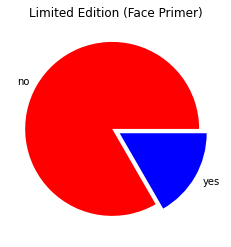

In [218]:
nama = ["no", "yes"]
plt.pie(limited.loc["Face Primer"], labels=nama, colors =["r","b"], explode = (0.05, 0.05))
plt.title("Limited Edition (Face Primer)")
plt.show()
# untuk yang Face Primer berarti berarti 16.7% limited edition, dan 83.3% tidak limited edition

## Insight
- Berdasarkan data yang didapatkan, bahwa category yang minati oleh Customers dari SEPHORA ada 21 kategori dari 92 kategori, namun ada beberapa category yang memiliki rating dibawah rata-rata yaitu ada 4 kategori yaitu Lipstick, Facial Cleansing, Mascara, Face Primer.
- Berdasarkan data yang didapatkan, bahwa ada 29 category yang kurang diminati oleh Customers (dibawah rata-rata review dari Customers) dan dibawah rata-rata rating keseluruhan Category.
- Top 5 dari penjualan berdasarkan rating diatas rata-rata yang diberikan oleh Customers dan review diatas rata-rata yang diberikan oleh Customers yaitu Eyeliner, Foundation, Face Brushes, Face Masks, Brush Cleaners.

## Conclusion & Recommendation
- Untuk category yang diminati oleh Customers namun memiliki rating dibawah rata-rata perlu diperluas jangkauan pasarnya, seperti menambahkan ke Online Store, karena seperti Lipstick, Mascara, dan Face Primer belum masuk di Online Store, sehingga dapat ditambahkan ke Online Store agar penjualannya meningkat.
- Agar rating dari keempat category yang diminati oleh Customers namun memiliki rating dibawah rata-rata untuk mengembangkannya bisa dilakukan pengembangan produk dengan melakukan riset terhadap Customers yang menggunakan produk tersebut dengan mendengarkan kelebihan dan kekurangan dari produk tersebut, apabila kekurangan tersebut banyak maka dapat ditingkatkan sesuai dengan mayoritas dari komentar customers.
- Agar orang makin tertarik membeli, maka perlu dikembangkan dan dibuat per 3 bulan sekali promosi untuk barang yang "Limited Edition" supaya para Customers semakin penasaran dengan barang yang limited edition.